In [ ]:
# !pip install datasets>=2.6.1
# !pip install librosa
# !pip install evaluate>=0.30
# !pip install jiwer/

In [ ]:
# from huggingface_hub import notebook_login
# notebook_login()

In [1]:
from datasets import load_dataset
import matplotlib.pyplot as plt



atco_asr_data = load_dataset('parquet',data_files="train-00000-of-00005-c6681348ac8543dc.parquet")

In [2]:
atco_asr_data['train'][0]

{'audio': {'path': 'LKPR_RUZYNE_Radar_120_520MHz_20201025_091112.wav',
  'array': array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -6.10351562e-05, -6.10351562e-05, -6.10351562e-05]),
  'sampling_rate': 16000},
 'text': 'Oscar Kilo Papa Mike Bravo descend flight level one hundred level one hundred Oscar Kilo Papa Mike Bravo ',
 'info': 'LKPR\nPraha Ruzyne\nRadar\nAKEVA ARVEG BAGRU BAROX BAVIN BEKVI ELMEK ELPON ERASU EVEMI KENOK KUVIX LETNA RATEV RISUK SOMIS SULOV TIPRU UTORO\nBLA131 BLA1XQ BTI7PY CTN480 DLH3NL DLH9TP ETD72E EWG6HP FIN1DH IRA711 KLM44K MLD863 MLD864 OKHBT OKLLZ OKMHZ OKPHM OKWUS17 OKYAI14 RYR1JU RYR4945 SXS7D THY32B THY6577 TIE790J UAE73  \nAll Charter Air Baltic Croatia Lufthansa Etihad Eurowings Finn Iranair Klm Moldova Oklahoma Okapi Alfa Ryan Sunexpress Turkish Time Emirates'}

In [4]:
import numpy as np
from IPython.display import Audio

audio_original = atco_asr_data['train'][0]['audio']['array']
original_sample_rate = atco_asr_data['train'][0]['audio']['sampling_rate']

audio_original.shape,original_sample_rate

((117760,), 16000)

In [5]:
# Play the audio
Audio(audio_original, rate=original_sample_rate)

In [14]:
from scipy.signal import resample


target_sample_rate = 16000

# Calculate the number of samples for the target sample rate
num_samples = int(len(audio_original) * target_sample_rate / original_sample_rate)

# Resample the audio array to the target sample rate
downsampled_audio = resample(audio_original, num_samples)


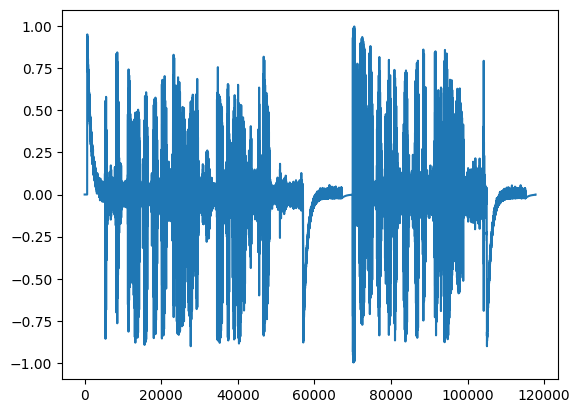

In [15]:
plt.plot(downsampled_audio)

In [7]:
print(downsampled_audio.shape,target_sample_rate)

# Play the audio
Audio(downsampled_audio, rate=target_sample_rate)

(117760,) 16000


# The 'targets' for the whisper model

In [6]:
target = atco_asr_data['train'][0]['text']
target

'Oscar Kilo Papa Mike Bravo descend flight level one hundred level one hundred Oscar Kilo Papa Mike Bravo '

In [7]:
from transformers import WhisperTokenizer

tokenizer = WhisperTokenizer.from_pretrained("openai/whisper-small",language='english',task='transcribe')


In [8]:
tokenizer_output = tokenizer(target,padding='max_length',max_length=448,truncation=True,return_tensors='pt')

encoded_target = tokenizer_output['input_ids']
attention_mask = tokenizer_output['attention_mask']

encoded_target.shape, attention_mask.shape

(torch.Size([1, 448]), torch.Size([1, 448]))

In [9]:
encoded_target

tensor([[50258, 50259, 50359, 50363,    46,  4417,   289,   591, 10720, 21102,
          6602, 28861, 16333,  7018,  1496,   472,  3262,  1496,   472,  3262,
         20718,   591, 10720, 21102,  6602, 28861,   220, 50257, 50257, 50257,
         50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257,
         50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257,
         50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257,
         50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257,
         50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257,
         50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257,
         50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257,
         50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257,
         50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257, 50257,
         50257, 50257, 50257, 50257, 50257, 50257, 5

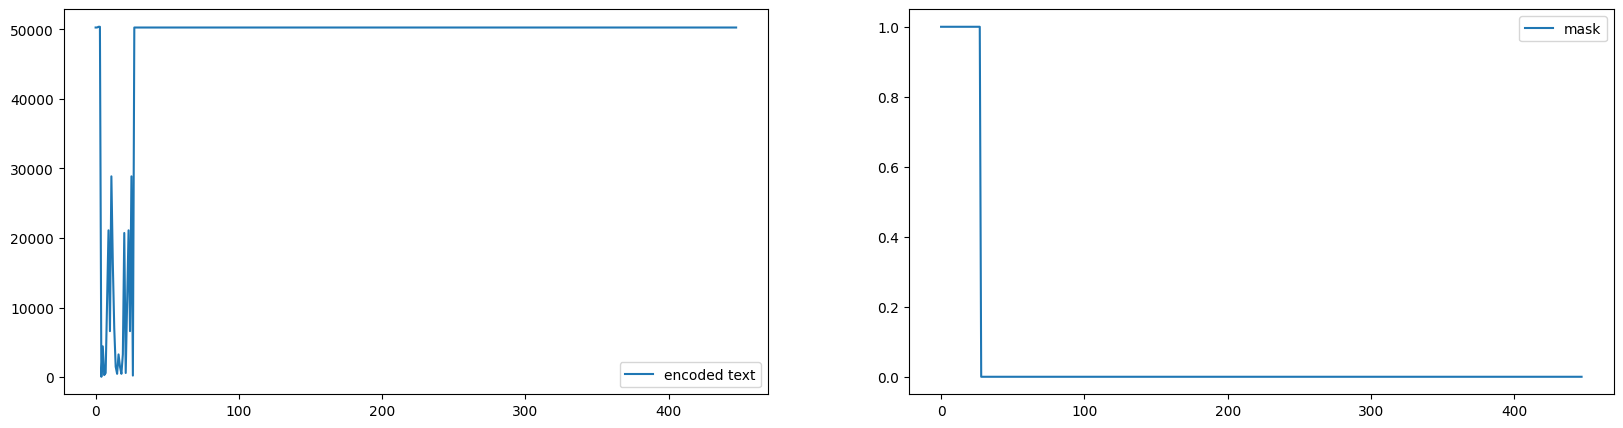

In [11]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(encoded_target.reshape(-1,1),label='encoded text')
plt.legend()
plt.subplot(1,2,2)
plt.plot(attention_mask.reshape(-1,1),label='mask')
plt.legend()
plt.show()

In [10]:
encoded_target = encoded_target.masked_fill(attention_mask.ne(1),-100)

In [11]:
encoded_target

tensor([[50258, 50259, 50359, 50363,    46,  4417,   289,   591, 10720, 21102,
          6602, 28861, 16333,  7018,  1496,   472,  3262,  1496,   472,  3262,
         20718,   591, 10720, 21102,  6602, 28861,   220, 50257,  -100,  -100,
          -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
          -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
          -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
          -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
          -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
          -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
          -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
          -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
          -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
          -100,  -100,  -100,  -100,  -100,  -100,  

In [12]:
tokenizer.decode(encoded_target[0])

'<|startoftranscript|><|en|><|transcribe|><|notimestamps|>Oscar Kilo Papa Mike Bravo descend flight level one hundred level one hundred Oscar Kilo Papa Mike Bravo <|endoftext|>'

# The input feature to the model

In [19]:
from transformers import WhisperFeatureExtractor

feature_extractor = WhisperFeatureExtractor.from_pretrained("openai/whisper-small",language='english',task='transcribe')

In [20]:
input_feature = feature_extractor(raw_speech=downsampled_audio,
                                  sampling_rate=16000,
                                  return_tensors='pt').input_features


input_feature.shape

torch.Size([1, 80, 3000])

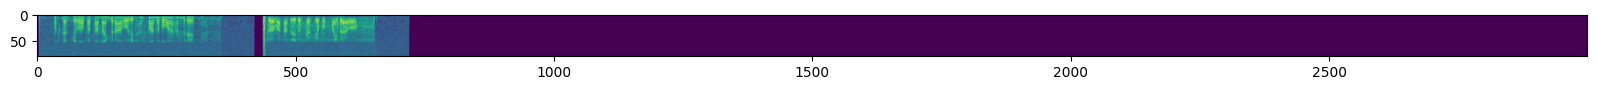

In [21]:
plt.figure(figsize=(20,20))
plt.imshow(input_feature.squeeze())
plt.show()

In [22]:
??feature_extractor

Signature:     
feature_extractor(
    raw_speech: Union[numpy.ndarray, List[float], List[numpy.ndarray], List[List[float]]],
    truncation: bool = True,
    pad_to_multiple_of: Optional[int] = None,
    return_tensors: Union[str, transformers.utils.generic.TensorType, NoneType] = None,
    return_attention_mask: Optional[bool] = None,
    padding: Optional[str] = 'max_length',
    max_length: Optional[int] = None,
    sampling_rate: Optional[int] = None,
    do_normalize: Optional[bool] = None,
    device: Optional[str] = 'cpu',
    return_token_timestamps: Optional[bool] = None,
    **kwargs,
) -> transformers.feature_extraction_utils.BatchFeature
Type:           WhisperFeatureExtractor
String form:   
WhisperFeatureExtractor {
  "chunk_length": 30,
  "feature_extractor_type": "WhisperFeatureExtractor",
  "feature_size": 80,
  "hop_length": 160,
  "n_fft": 400,
  "n_samples": 480000,
  "nb_max_frames": 3000,
  "padding_side": "right",
  "padding_value": 0.0,
  "processor_class": "Wh

# Prediction using the Whisper Model

In [23]:
from transformers import WhisperForConditionalGeneration
import torch

model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-small").to('cuda')

In [25]:
with torch.no_grad():
    op = model.generate(input_feature.to('cuda'), language='english', task='transcribe')


tokenizer.batch_decode(op,skip_special_tokens=False)

# # # ??model
with torch.no_grad():
    op = model(input_feature.to('cuda'), labels=encoded_target.to('cuda'))

print(op.loss)
print(op.logits.shape)

activations = torch.nn.functional.softmax(op.logits,dim=-1)
pred_token_ids = torch.argmax(activations,dim=-1)
print(activations.shape, pred_token_ids.shape)

print(tokenizer.batch_decode(pred_token_ids,skip_special_tokens=False))

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.43.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


tensor(3.8585, device='cuda:0')
torch.Size([1, 448, 51865])
torch.Size([1, 448, 51865]) torch.Size([1, 448])
['<|cs|><|translate|><|transcribe|><|notimestamps|> Oscarscar,ilo, Mike Bravo, to level 100 hundred<|endoftext|> one hundred O Kilo Papa Mike Bravo<|endoftext|>!!!!<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|

# Performance before finetuning

In [26]:
import torch

for idx in range(5):

    target = atco_asr_data['train'][idx]['text']
    audio_original = atco_asr_data['train'][idx]['audio']['array']

    input_feature = feature_extractor(raw_speech=audio_original,
                                    sampling_rate=16000,
                                    return_tensors='pt').input_features

    with torch.no_grad():
        op = model.generate(input_feature.to('cuda'), language='english', task='transcribe')


    text_pred =  tokenizer.batch_decode(op,skip_special_tokens=True )[0]

    print(f'-------{idx}------')
    print(f'true : {target} \npred : {text_pred}')
    print('\n ')

-------0------
true : Oscar Kilo Papa Mike Bravo descend flight level one hundred level one hundred Oscar Kilo Papa Mike Bravo  
pred :  Oscar Quilopapa Mike Bravo, RISC100

 
-------1------
true : Oscar Kilo Kilo Echo Alfa Praha Radar identified climb flight level one hundred IFR flight starts  now time zero five cleared to destination via flight plan route  
pred :  Oscar kilo kilo, Eqa, Praha radar identified. Consulate level 100, AFL, now time 05, quick destination, WFL, BenRoot.

 
-------2------
true : Ryanair Seven Three Alpha Hotel turn left heading three six zero Ryanair Seven Three Alpha Hotel  
pred :  Ryanair 730 hotel on left heading 360 Ryanair 730 hotel

 
-------3------
true : Oscar Kilo Kilo Uniform November proceed direct Baltu proceed direct Baltu Oscar Kilo Kilo Uniform November  
pred :  Oscar, what did you say in the phone number?

 
-------4------
true : Oscar Mike Papa turn right heading zero two zero cleared ILS approach runway zero six speed maximum one six ze

# Do a single forward pass through the WHISPER model

In [25]:
idx=0

target = atco_asr_data['train'][idx]['text']
audio_original = atco_asr_data['train'][idx]['audio']['array']

tokenizer_output = tokenizer(target,padding='max_length',max_length=448,truncation=True,return_tensors='pt')
encoded_target = tokenizer_output['input_ids']
attention_mask = tokenizer_output['attention_mask']
encoded_target = encoded_target.masked_fill(attention_mask.ne(1),-100)

input_feature = feature_extractor(raw_speech=downsampled_audio,
                                  sampling_rate=16000,
                                  return_tensors='pt').input_features

# Do a single backward pass and weight update

In [27]:
model.train()  # Set model to training mode
optimizer=torch.optim.AdamW(model.parameters(), lr=1e-5)

for iter in range(30):

    # idx=np.random.randint(0,5)

    # target = atco_asr_data['train'][idx]['text']
    # audio_original = atco_asr_data['train'][idx]['audio']['array']

    # tokenizer_output = tokenizer(target,padding='max_length',max_length=448,truncation=True,return_tensors='pt')
    # encoded_target = tokenizer_output['input_ids']
    # attention_mask = tokenizer_output['attention_mask']
    # encoded_target = encoded_target.masked_fill(attention_mask.ne(1),-100)

    # input_feature = feature_extractor(raw_speech=downsampled_audio,
    #                                 sampling_rate=16000,
    #                                 return_tensors='pt').input_features

    outputs = model(input_feature.to('cuda'), labels=encoded_target.to('cuda'))  # Assuming your model takes these inputs
    loss = outputs.loss

    # Backward pass and optimization

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()  # Reset gradients

    print(loss.item())

8.026735305786133
5.9232096672058105
4.713560581207275
3.823972463607788
3.0890488624572754
2.4784252643585205
1.9952868223190308
1.5919936895370483
1.2343981266021729
0.9691165089607239
0.7761896848678589
0.624315619468689
0.5210109949111938
0.4722239375114441
0.4481036067008972
0.4335808753967285
0.4233279824256897
0.41518473625183105
0.40818652510643005
0.4017825722694397
0.39566224813461304
0.38969191908836365
0.38383427262306213
0.378086656332016
0.3724459707736969
0.36690816283226013
0.3614787757396698
0.35618025064468384
0.3510579764842987
0.3461579382419586


# Performance after 30 steps

In [28]:
model.eval()


for idx in range(5):

    target = atco_asr_data['train'][idx]['text']
    audio_original = atco_asr_data['train'][idx]['audio']['array']

    input_feature = feature_extractor(raw_speech=audio_original,
                                    sampling_rate=16000,
                                    return_tensors='pt').input_features

    with torch.no_grad():
        op = model.generate(input_feature.to('cuda'), language='english', task='transcribe')


    text_pred =  tokenizer.batch_decode(op,skip_special_tokens=True )[0]

    print(f'-------{idx}------')
    print(f'true : {target} \npred : {text_pred}')
    print('\n')


-------0------
true : Oscar Kilo Papa Mike Bravo descend flight level one hundred level one hundred Oscar Kilo Papa Mike Bravo  
pred :  Oscar Quilopo Mike Bravo descend level one hundred Oscar Quilopo Mike Bravo 


-------1------
true : Oscar Kilo Kilo Echo Alfa Praha Radar identified climb flight level one hundred IFR flight starts  now time zero five cleared to destination via flight plan route  
pred :  Oscar Kilo Kilo Kuala Prada identified consulate level one hundred level one hundred Oscar Kilo Kilo Kuala Prada identified consulate level one hundred Oscar Kilo Kilo Kilo Kuala Prada identified consulate level one hundred Oscar Kilo Kilo Kilo Kuala Prada identified consulate level one hundred Oscar Kilo Kilo Kilo Kuala Prada identified consulate level one hundred Oscar Kilo Kilo Kilo Kuala Prada identified consulate level one hundred Oscar Kilo Kilo Kilo Kuala Prada identified consulate level one hundred Oscar Kilo Kilo Kilo Kuala Prada identified consulate level one hundred Oscar

In [136]:
??model

Signature:   model(*args, **kwargs)
Type:        WhisperForConditionalGeneration
String form:
WhisperForConditionalGeneration(
  (model): WhisperModel(
    (encoder): WhisperEncoder(
      (conv1): Conv1d(80, 1024, kernel_size=(3,), stride=(1,), padding=(1,))
      (conv2): Conv1d(1024, 1024, kernel_size=(3,), stride=(2,), padding=(1,))
      (embed_positions): Embedding(1500, 1024)
      (layers): ModuleList(
        (0-23): 24 x WhisperEncoderLayer(
          (self_attn): WhisperSdpaAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=False)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1024, o

In [133]:
??model.generate

Signature:
model.generate(
    input_features: Optional[torch.Tensor] = None,
    generation_config: Optional[transformers.generation.configuration_utils.GenerationConfig] = None,
    logits_processor: Optional[transformers.generation.logits_process.LogitsProcessorList] = None,
    stopping_criteria: Optional[transformers.generation.stopping_criteria.StoppingCriteriaList] = None,
    prefix_allowed_tokens_fn: Optional[Callable[[int, torch.Tensor], List[int]]] = None,
    synced_gpus: bool = False,
    return_timestamps: Optional[bool] = None,
    task: Optional[str] = None,
    language: Union[List[str], str, NoneType] = None,
    is_multilingual: Optional[bool] = None,
    prompt_ids: Optional[torch.Tensor] = None,
    prompt_condition_type: Optional[str] = None,
    condition_on_prev_tokens: Optional[bool] = None,
    temperature: Union[float, Tuple[float, ...], NoneType] = None,
    compression_ratio_threshold: Optional[float] = None,
    logprob_threshold: Optional[float] = None,
 

In [116]:
??model

Signature:   model(*args, **kwargs)
Type:        WhisperForConditionalGeneration
String form:
WhisperForConditionalGeneration(
  (model): WhisperModel(
    (encoder): WhisperEncoder(
      (conv1): Conv1d(80, 768, kernel_size=(3,), stride=(1,), padding=(1,))
      (conv2): Conv1d(768, 768, kernel_size=(3,), stride=(2,), padding=(1,))
      (embed_positions): Embedding(1500, 768)
      (layers): ModuleList(
        (0-11): 12 x WhisperEncoderLayer(
          (self_attn): WhisperSdpaAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=False)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=768, out_features=30